<a href="https://colab.research.google.com/github/Divya6859/car-price-prediction/blob/main/CAR_PRICE_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [ ]:
df = pd.read_csv('/content/quikr_car.csv')
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


Checking Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [ ]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [ ]:
df.isnull().sum()

,0
name,0
company,0
year,0
Price,0
kms_driven,52
fuel_type,55


Data Cleaning

In [ ]:
# Drop rows where Price is "Ask For Price"
df = df[df['Price'] != "Ask For Price"]

In [ ]:
# Clean Price,convert to int
df['Price'] = df['Price'].str.replace(',', '').astype(int)


In [ ]:
# Clean kms_driven
df['kms_driven'] = df['kms_driven'].str.replace('kms', '').str.replace(',', '').str.strip()
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')

In [ ]:
# Drop rows with NaN values
df = df.dropna()

In [ ]:
# Convert year to integer
df['year'] = df['year'].astype(int)

"Ask For Price" is not usable → removed

Price cleaned → converted to integers (target variable)

kms_driven → cleaned from strings to numbers

year → ensured integer type

Missing values → dropped

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        816 non-null    object 
 1   company     816 non-null    object 
 2   year        816 non-null    int64  
 3   Price       816 non-null    int64  
 4   kms_driven  816 non-null    float64
 5   fuel_type   816 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 44.6+ KB


In [ ]:
# Remove unrealistic outlier prices
df = df[df['Price'] < 6000000]

In [ ]:
print("After Cleaning Shape:", df.shape)

After Cleaning Shape: (815, 6)


Exploratory Data Analysis

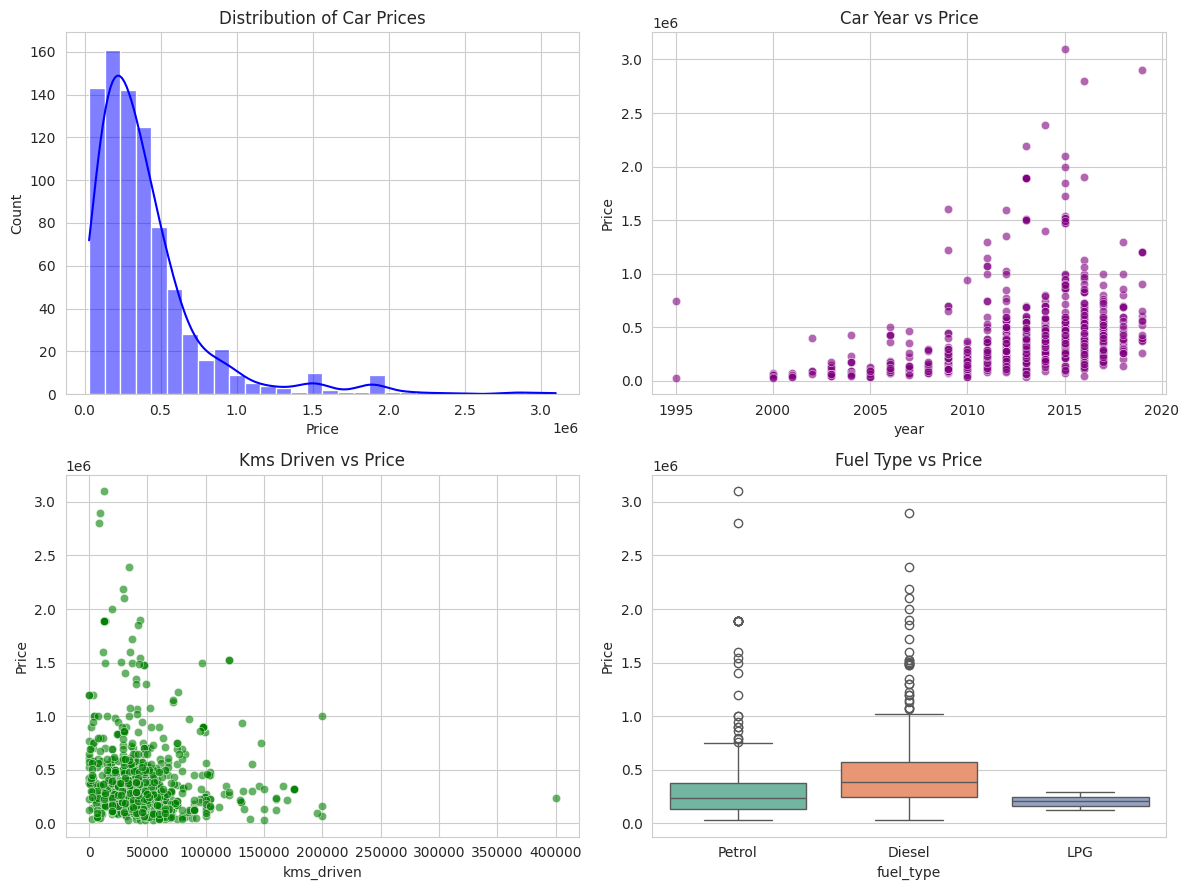

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,9))

plt.subplot(2,2,1)
sns.histplot(df['Price'], bins=30, kde=True, color="blue")
plt.title("Distribution of Car Prices")

plt.subplot(2,2,2)
sns.scatterplot(x='year', y='Price', data=df, alpha=0.6, color="purple")
plt.title("Car Year vs Price")

plt.subplot(2,2,3)
sns.scatterplot(x='kms_driven', y='Price', data=df, alpha=0.6, color="green")
plt.title("Kms Driven vs Price")

plt.subplot(2,2,4)
sns.boxplot(x='fuel_type', y='Price', data=df, palette="Set2")
plt.title("Fuel Type vs Price")

plt.tight_layout()
plt.show()

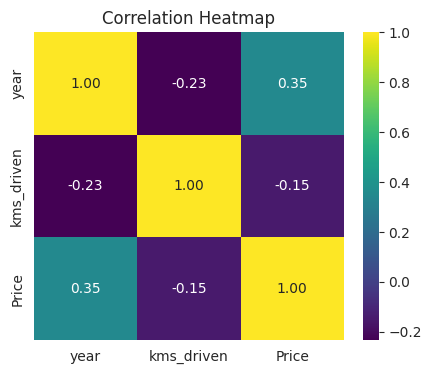

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(df[['year','kms_driven','Price']].corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Feature Selection

In [ ]:
X = df[['year', 'kms_driven', 'fuel_type', 'company']]
y = df['Price']

 One-Hot Encode categorical features

In [ ]:
X = pd.get_dummies(X, drop_first=True)
print("Final feature set shape:", X.shape)

Final feature set shape: (815, 28)


Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train Model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin_model.predict(X_test)

Model Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
print("Linear Regression → R²:", r2_score(y_test, y_pred),
      ", MAE:", mean_absolute_error(y_test, y_pred))

Linear Regression → R²: 0.6627174404563415 , MAE: 153075.7369326972


Visualization of Predictions

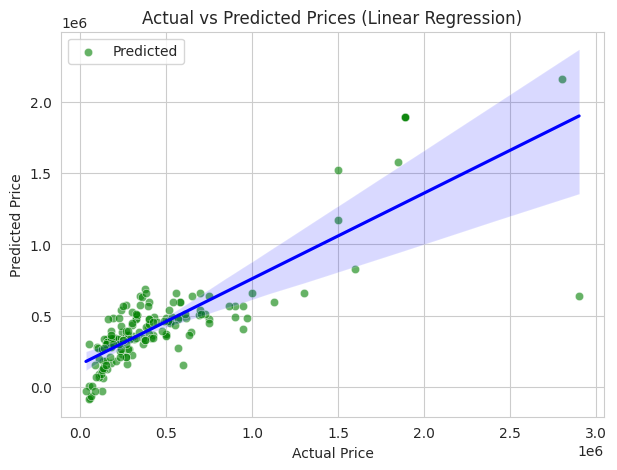

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color="green", alpha=0.6, label="Predicted")
sns.regplot(x=y_test, y=y_pred, scatter=False, color="blue", line_kws={"label":"Regression Line"})
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.legend()
plt.show()

Predictive System

In [ ]:
sample = pd.DataFrame({
    'year': [2018],
    'kms_driven': [32000],
    'fuel_type': ['Diesel'],
    'company': ['Toyota']
})

# Encode like training
sample = pd.get_dummies(sample)
sample = sample.reindex(columns=X.columns, fill_value=0)

pred_price = lin_model.predict(sample)[0]

print(f"Predictive System Result:")
print(f"Predicted Resale Price: ₹ {int(pred_price)}")

Predictive System Result:
Predicted Resale Price: ₹ 816672
